<a href="https://colab.research.google.com/github/Aatti13/Applied-Machine-Learning-Python-/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DRL for Automated Trading and Sentiment Analysis and XAI

### Team Members:
- Aattreya K.S (22BCE0078)
- Ansh Rajendra Desai (22BCE2332)
- Atharva Harishchandra Gharge (22BEC0593)
- Atul Kumar (22BEC0610)

In [22]:
!pip install yfinance stable_baselines3 gymnasium

In [23]:
import yfinance as yf
import pandas as pd

# List of Nifty 50 stocks (as of 2023) - you may need to update this
nifty50_tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS',
    'HINDUNILVR.NS', 'HDFC.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS',
    'SBIN.NS', 'BAJFINANCE.NS', 'AXISBANK.NS', 'ASIANPAINT.NS', 'MARUTI.NS',
    'HCLTECH.NS', 'SUNPHARMA.NS', 'ULTRACEMCO.NS', 'TITAN.NS', 'BAJAJFINSV.NS',
    'TATAMOTORS.NS', 'ADANIPORTS.NS', 'ONGC.NS', 'NESTLEIND.NS', 'NTPC.NS',
    'HDFCLIFE.NS', 'TATASTEEL.NS', 'POWERGRID.NS', 'M&M.NS', 'TECHM.NS',
    'WIPRO.NS', 'GRASIM.NS', 'INDUSINDBK.NS', 'HINDALCO.NS', 'JSWSTEEL.NS',
    'SBILIFE.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'DRREDDY.NS', 'DIVISLAB.NS',
    'EICHERMOT.NS', 'CIPLA.NS', 'BPCL.NS', 'COALINDIA.NS', 'UPL.NS',
    'IOC.NS', 'TATACONSUM.NS', 'HEROMOTOCO.NS', 'ADANIENT.NS', 'BAJAJ-AUTO.NS'
]

# Function to download data for a single ticker
def download_stock_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        print(f"Downloaded {ticker} data: {len(data)} rows")
        return data
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")
        return None

# Download data for all Nifty 50 stocks
start_date = '2018-01-01'
end_date = '2023-01-01'

# Create a dictionary to store data for each stock
nifty_data = {}

for ticker in nifty50_tickers:
    stock_data = download_stock_data(ticker, start_date, end_date)
    if stock_data is not None and not stock_data.empty:
        nifty_data[ticker] = stock_data
        # Save individual stock data
        stock_data.to_csv(f'data/{ticker.replace(".NS", "")}_data.csv')

print(f"Successfully downloaded data for {len(nifty_data)} stocks")

[*********************100%***********************]  1 of 1 completed


Downloaded RELIANCE.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded TCS.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded HDFCBANK.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded INFY.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded ICICIBANK.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded HINDUNILVR.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.NS']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Downloaded HDFC.NS data: 0 rows
Downloaded ITC.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded KOTAKBANK.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded LT.NS data: 1236 rows
Downloaded SBIN.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded BAJFINANCE.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded AXISBANK.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded ASIANPAINT.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded MARUTI.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded HCLTECH.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded SUNPHARMA.NS data: 1236 rows
Downloaded ULTRACEMCO.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded TITAN.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded BAJAJFINSV.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded TATAMOTORS.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded ADANIPORTS.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded ONGC.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded NESTLEIND.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded NTPC.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded HDFCLIFE.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded TATASTEEL.NS data: 1236 rows
Downloaded POWERGRID.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded M&M.NS data: 1236 rows
Downloaded TECHM.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded WIPRO.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded GRASIM.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded INDUSINDBK.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded HINDALCO.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded JSWSTEEL.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded SBILIFE.NS data: 1236 rows
Downloaded BHARTIARTL.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded BRITANNIA.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded DRREDDY.NS data: 1236 rows


Downloaded DIVISLAB.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded EICHERMOT.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded CIPLA.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded BPCL.NS data: 1236 rows
Downloaded COALINDIA.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded UPL.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded IOC.NS data: 1236 rows
Downloaded TATACONSUM.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded HEROMOTOCO.NS data: 1236 rows


[*********************100%***********************]  1 of 1 completed


Downloaded ADANIENT.NS data: 1236 rows
Downloaded BAJAJ-AUTO.NS data: 1236 rows
Successfully downloaded data for 49 stocks


### This is an example of the datasets obtained

In [24]:
# prompt: remove the NaN values

import pandas as pd
import os

# Assuming 'data' directory exists and contains the downloaded CSV files
data_dir = 'data'

for filename in os.listdir(data_dir):
    if filename.endswith('_data.csv'):
        filepath = os.path.join(data_dir, filename)
        try:
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(filepath)

            # Remove rows with NaN values in any column
            df.dropna(inplace=True)

            # Save the cleaned DataFrame back to the CSV file
            df.to_csv(filepath, index=False)  # index=False prevents writing row indices
            print(f"NaN values removed and saved to {filepath}")

        except pd.errors.EmptyDataError:
            print(f"File {filename} is empty, skipping.")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


NaN values removed and saved to data/BAJAJFINSV_data.csv
NaN values removed and saved to data/HEROMOTOCO_data.csv
NaN values removed and saved to data/BAJAJ-AUTO_data.csv
NaN values removed and saved to data/DRREDDY_data.csv
NaN values removed and saved to data/HDFCBANK_data.csv
NaN values removed and saved to data/NESTLEIND_data.csv
NaN values removed and saved to data/M&M_data.csv
NaN values removed and saved to data/ASIANPAINT_data.csv
NaN values removed and saved to data/NTPC_data.csv
NaN values removed and saved to data/TCS_data.csv
NaN values removed and saved to data/BRITANNIA_data.csv
NaN values removed and saved to data/TATACONSUM_data.csv
NaN values removed and saved to data/JSWSTEEL_data.csv
NaN values removed and saved to data/POWERGRID_data.csv
NaN values removed and saved to data/TATASTEEL_data.csv
NaN values removed and saved to data/ONGC_data.csv
NaN values removed and saved to data/AXISBANK_data.csv
NaN values removed and saved to data/SBILIFE_data.csv
NaN values remov

In [25]:
df = pd.read_csv('data/RELIANCE_data.csv')
df = df.iloc[1:]
df.head()

,Price,Close,High,Low,Open,Volume
1,2018-01-01,406.4334716796875,412.2189060089457,405.42827647204416,412.2189060089457,9453202
2,2018-01-02,407.05889892578125,410.81163557072085,404.93682351457966,407.8853980466835,9499419
3,2018-01-03,408.6895751953125,413.6932142985035,407.9077500617798,413.2464442982955,13507800
4,2018-01-04,411.14666748046875,411.8168075070726,409.0916032094852,410.1861463653934,9008932
5,2018-01-05,412.4646301269531,414.0952914640221,411.12437973559236,411.816856851976,7441284


In [26]:
import pandas as pd
import random

# Load your stock dataset
df = pd.read_csv('data/RELIANCE_data.csv')

# Simulated News Sentences
positive_news = [
    "Positive: Company reports strong quarterly earnings",
    "Positive sentiment as shares gain",
    "Positive outlook from analysts"
]

neutral_news = [
    "Neutral market movement expected",
    "Stock remains steady",
    "Company continues usual operations"
]

negative_news = [
    "Negative: Company under investigation",
    "Negative news: profit margins fall",
    "Shares drop after weak forecast"
]

# Add fake News column with random sentiments
def generate_news():
    return random.choice(positive_news + neutral_news + negative_news)

df['News'] = [generate_news() for _ in range(len(df))]

# Save to new CSV
df.to_csv('data/RELIANCE_data_with_news.csv', index=False)
print("News column added and saved to RELIANCE_data_with_news.csv")


News column added and saved to RELIANCE_data_with_news.csv


In [27]:
df.head()

,Price,Close,High,Low,Open,Volume,News
0,Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,Positive: Company reports strong quarterly ear...
1,2018-01-01,406.4334716796875,412.2189060089457,405.42827647204416,412.2189060089457,9453202,Stock remains steady
2,2018-01-02,407.05889892578125,410.81163557072085,404.93682351457966,407.8853980466835,9499419,Positive outlook from analysts
3,2018-01-03,408.6895751953125,413.6932142985035,407.9077500617798,413.2464442982955,13507800,Shares drop after weak forecast
4,2018-01-04,411.14666748046875,411.8168075070726,409.0916032094852,410.1861463653934,9008932,Positive sentiment as shares gain


In [28]:
!pip install transformers

In [29]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

# Load dataset
df = pd.read_csv("data/RELIANCE_data_with_news.csv")

# Load FinBERT sentiment model
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Sentiment categories
labels = ["negative", "neutral", "positive"]
label_to_int = {"negative": -1, "neutral": 0, "positive": 1}

def classify_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = labels[torch.argmax(probs)]
    return label_to_int[predicted_class]

# Apply sentiment analysis to the News column
df["Sentiment"] = df["News"].astype(str).apply(classify_sentiment)

# Save the updated dataset
df.to_csv("data/RELIANCE_data_with_sentiment.csv", index=False)
print("Sentiment column added and saved to RELIANCE_data_with_sentiment.csv")


Sentiment column added and saved to RELIANCE_data_with_sentiment.csv


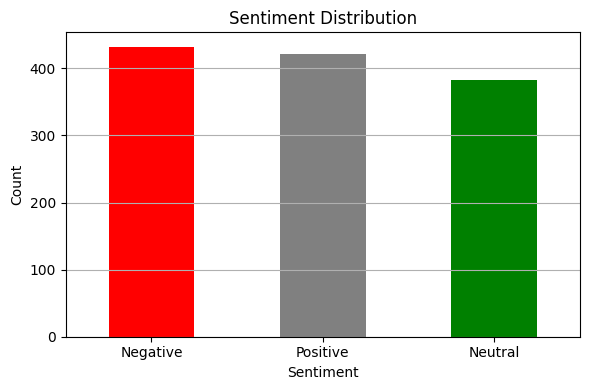

In [30]:
import matplotlib.pyplot as plt

# Map int sentiment to labels for clarity in plot
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
sentiment_counts = df['Sentiment'].map(label_map).value_counts()

# Plot
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-31-62687c04b88e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Label', palette={'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'})


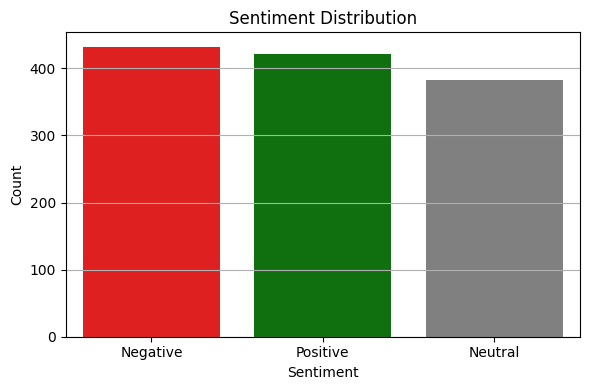

In [31]:
import seaborn as sns

# If you haven't installed seaborn: pip install seaborn
df['Sentiment_Label'] = df['Sentiment'].map(label_map)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment_Label', palette={'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'})
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-32-9abda00b6ae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Price'])  # Assuming 'Price' column has date info


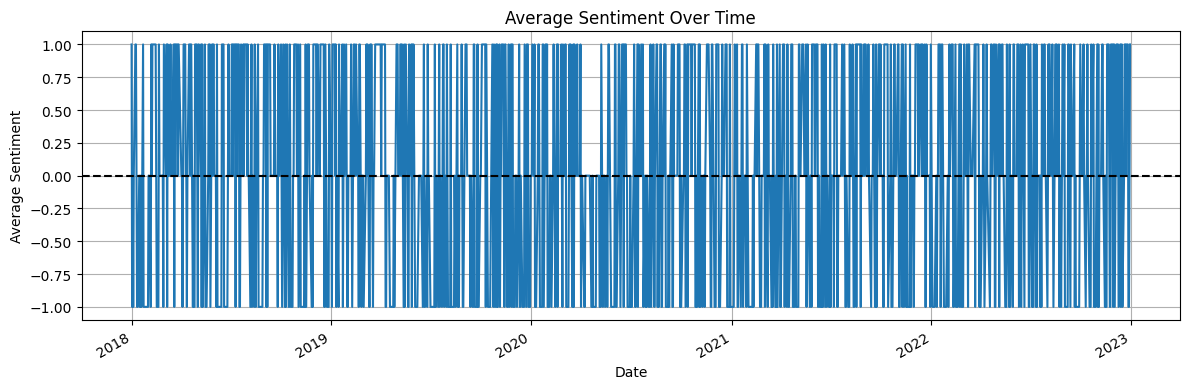

In [32]:
df = df.iloc[1:]
df['Date'] = pd.to_datetime(df['Price'])  # Assuming 'Price' column has date info
sentiment_by_date = df.groupby('Date')['Sentiment'].mean()

plt.figure(figsize=(12, 4))
sentiment_by_date.plot()
plt.title("Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


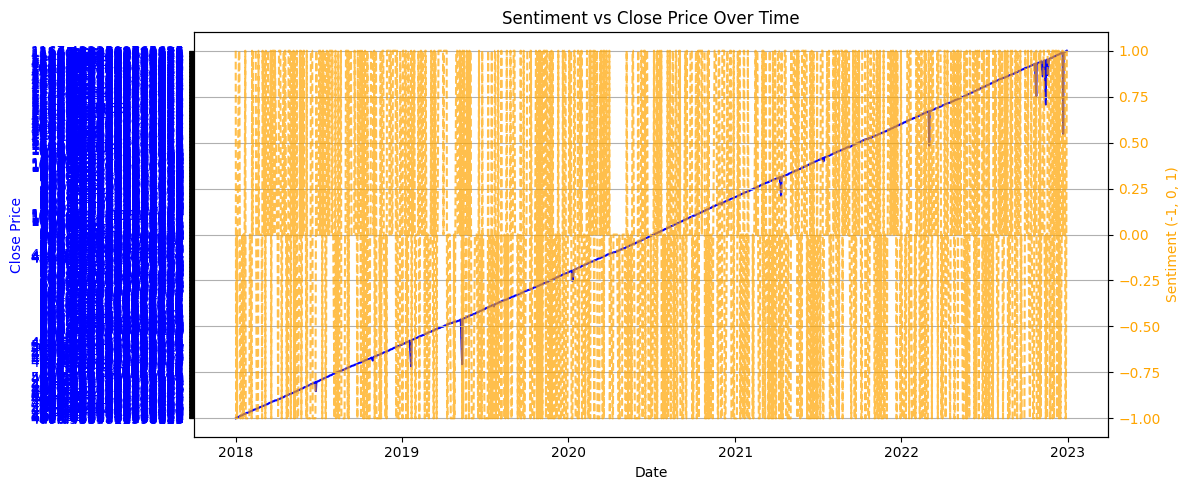

In [33]:
import matplotlib.pyplot as plt

# Optional: convert date column if needed
df['Date'] = pd.to_datetime(df['Price'])

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot stock Close price
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Sentiment'], color='orange', label='Sentiment', linestyle='--', alpha=0.7)
ax2.set_ylabel('Sentiment (-1, 0, 1)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and grid
plt.title('Sentiment vs Close Price Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


In [34]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax

class StockTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000, stop_loss_pct=0.1, max_drawdown_pct=0.2):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.stop_loss_pct = stop_loss_pct
        self.max_drawdown_pct = max_drawdown_pct

        self.action_space = gym.spaces.Discrete(3)  # Buy, Sell, Hold
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(7,), dtype=np.float32)

        self.seed()
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 0
        self.balance = self.initial_balance
        self.shares_held = 0
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.net_worths = []
        self.actions = []
        self.max_steps = len(self.df) - 1
        return self._next_observation(), {}

    def step(self, action):
        done = False
        terminated = False
        truncated = False
        current_price = self.df.loc[self.current_step, 'Close']

        if action == 0 and self.balance >= current_price:  # Buy
            self.shares_held += 1
            self.balance -= current_price
        elif action == 1 and self.shares_held > 0:  # Sell
            self.balance += current_price
            self.shares_held -= 1

        self.net_worth = self.balance + self.shares_held * current_price
        self.max_net_worth = max(self.max_net_worth, self.net_worth)
        self.net_worths.append(self.net_worth)
        self.actions.append(action)

        drawdown = (self.max_net_worth - self.net_worth) / self.max_net_worth
        stop_loss_triggered = self.net_worth <= self.initial_balance * (1 - self.stop_loss_pct)
        max_drawdown_triggered = drawdown >= self.max_drawdown_pct
        terminated = stop_loss_triggered or max_drawdown_triggered or self.current_step >= self.max_steps

        reward = self.net_worth - self.initial_balance
        self.current_step += 1
        obs = self._next_observation()
        info = {
            "net_worth": self.net_worth,
            "stop_loss": stop_loss_triggered,
            "max_drawdown": max_drawdown_triggered
        }
        return obs, reward, terminated, truncated, info

    def _next_observation(self):
        row = self.df.loc[self.current_step]
        obs = np.array([
            row['Open'], row['High'], row['Low'], row['Close'],
            row['Volume'], self.balance, row.get('SentimentScore', 0)
        ], dtype=np.float32)
        return obs

    def render(self):
        print(f"Step {self.current_step} - Net Worth: {self.net_worth:.2f} | Balance: {self.balance:.2f} | Shares: {self.shares_held}")

    def plot_results(self):
        prices = self.df['Close'].values[:len(self.net_worths)]
        sentiments = self.df['SentimentScore'].values[:len(self.net_worths)]

        plt.figure(figsize=(14, 8))

        # Net Worth
        plt.subplot(2, 2, 1)
        plt.plot(self.net_worths, label='Net Worth', color='green')
        plt.title('Net Worth Over Time')
        plt.grid(True)

        # Stock price with buy/sell markers
        plt.subplot(2, 2, 2)
        plt.plot(prices, label='Stock Price', color='blue')
        buys = [i for i, a in enumerate(self.actions) if a == 0]
        sells = [i for i, a in enumerate(self.actions) if a == 1]
        plt.scatter(buys, [prices[i] for i in buys], marker='^', color='green', label='Buy')
        plt.scatter(sells, [prices[i] for i in sells], marker='v', color='red', label='Sell')
        plt.title('Stock Price with Actions')
        plt.grid(True)

        # Sentiment Score over time
        plt.subplot(2, 2, 3)
        plt.plot(sentiments, label='Sentiment Score', color='orange')
        plt.title('Sentiment Over Time')
        plt.grid(True)

        # Sentiment histogram
        plt.subplot(2, 2, 4)
        plt.hist(sentiments, bins=20, color='purple', edgecolor='black')
        plt.title('Sentiment Distribution')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def seed(self, seed=None):
        self.np_random, seed = gym.utils.seeding.np_random(seed)
        return [seed]


In [41]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import pandas as pd
import numpy as np

# Load sentiment-processed test dataset
df = pd.read_csv("data/RELIANCE_data_with_sentiment.csv").iloc[1:]
df = df.drop(["News", "Price"], axis=1)
df.head()

# env = DummyVecEnv([lambda: StockTradingEnv(df)])
# model = PPO("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=100000)
# model.save("ppo_sentiment_trading_model")

# # Reinitialize your trading environment in test mode
# env = StockTradingEnv(df)
# model = PPO.load("ppo_stock_trading_model")  # Load the trained model

# # Reset environment
# obs, _ = env.reset()
# done = False

# # Store history
# actions, net_worths, prices, sentiments = [], [], [], []

# while not done:
#     action, _ = model.predict(obs, deterministic=True)
#     obs, reward, done, _, info = env.step(action)

#     actions.append(action)
#     net_worths.append(env.net_worth)
#     prices.append(env.df.loc[env.current_step, "Close"])
#     sentiments.append(env.df.loc[env.current_step, "Sentiment"])

# # Plot performance
# env.plot_performance()

# # Optionally save logs
# paper_df = pd.DataFrame({
#     'Step': range(len(actions)),
#     'Action': actions,
#     'Net_Worth': net_worths,
#     'Price': prices,
#     'Sentiment': sentiments
# })
# paper_df.to_csv("paper_trading_results.csv", index=False)


,Close,High,Low,Open,Volume,Sentiment
1,406.4334716796875,412.2189060089457,405.42827647204416,412.2189060089457,9453202,1
2,407.05889892578125,410.81163557072085,404.93682351457966,407.8853980466835,9499419,-1
3,408.6895751953125,413.6932142985035,407.9077500617798,413.2464442982955,13507800,0
4,411.14666748046875,411.8168075070726,409.0916032094852,410.1861463653934,9008932,-1
5,412.4646301269531,414.0952914640221,411.12437973559236,411.816856851976,7441284,0
